# Importing python's library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_json('C:/Users/Khushi Patidar/Desktop/cooking/train.json')
train.set_index('id',inplace=True)

In [3]:
test=pd.read_json('C:/Users/Khushi Patidar/Desktop/cooking/test.json')
test.set_index('id',inplace=True)

In [4]:
test.shape

(9944, 1)

In [5]:
test.head()

ingredients
id                                                      
18009  [baking powder, eggs, all-purpose flour, raisi...
28583  [sugar, egg yolks, corn starch, cream of tarta...
41580  [sausage links, fennel bulb, fronds, olive oil...
29752  [meat cuts, file powder, smoked sausage, okra,...
35687  [ground black pepper, salt, sausage casings, l...

In [6]:
train.shape

(39774, 2)

In [7]:
train.head()

cuisine                                        ingredients
id                                                                   
10259        greek  [romaine lettuce, black olives, grape tomatoes...
25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
22213       indian                [water, vegetable oil, wheat, salt]
13162       indian  [black pepper, shallots, cornflour, cayenne pe...

In [8]:
y = pd.DataFrame(train.cuisine.copy(),columns=['cuisine'])
y

cuisine
id                
10259        greek
25693  southern_us
20130     filipino
22213       indian
13162       indian
...            ...
29109        irish
11462      italian
2238         irish
41882      chinese
2362       mexican

[39774 rows x 1 columns]

In [9]:
train_cuisine=train.drop("cuisine", axis=1)

In [10]:
train_cuisine

ingredients
id                                                      
10259  [romaine lettuce, black olives, grape tomatoes...
25693  [plain flour, ground pepper, salt, tomatoes, g...
20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
22213                [water, vegetable oil, wheat, salt]
13162  [black pepper, shallots, cornflour, cayenne pe...
...                                                  ...
29109  [light brown sugar, granulated sugar, butter, ...
11462  [KRAFT Zesty Italian Dressing, purple onion, b...
2238   [eggs, citrus fruit, raisins, sourdough starte...
41882  [boneless chicken skinless thigh, minced garli...
2362   [green chile, jalapeno chilies, onions, ground...

[39774 rows x 1 columns]

# Adding ingredients of both train and test dataset

In [11]:
train = pd.concat([train_cuisine, test], axis=0)
print("All Data Shape: ", train.shape)
train.head()

All Data Shape:  (49718, 1)


ingredients
id                                                      
10259  [romaine lettuce, black olives, grape tomatoes...
25693  [plain flour, ground pepper, salt, tomatoes, g...
20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
22213                [water, vegetable oil, wheat, salt]
13162  [black pepper, shallots, cornflour, cayenne pe...

# Counting unique values of cuisine(target column)

In [12]:
y['cuisine'].value_counts().sort_values(ascending=False)

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

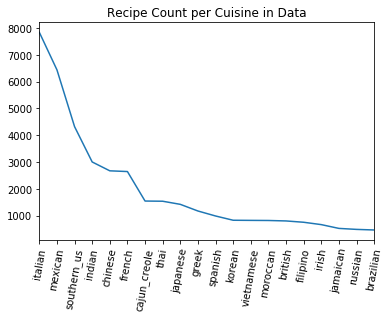

In [13]:
plt.title('Recipe Count per Cuisine in Data')
ax = y.cuisine.value_counts().plot()
plt.xticks(np.arange(len(y.cuisine.unique())), y.cuisine.value_counts().index, rotation=80)
plt.show()

In [14]:
y.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [15]:
cloud=pd.concat([y,train_cuisine],axis=1)

In [16]:
cloud.head()

cuisine                                        ingredients
id                                                                   
10259        greek  [romaine lettuce, black olives, grape tomatoes...
25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
22213       indian                [water, vegetable oil, wheat, salt]
13162       indian  [black pepper, shallots, cornflour, cayenne pe...

In [17]:
cloud.shape

(39774, 2)

In [18]:
cloud.isnull().sum()

cuisine        0
ingredients    0
dtype: int64

# Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.
## Here I am importing wordcloud and checking frequency of each word in each unique cuisine column.

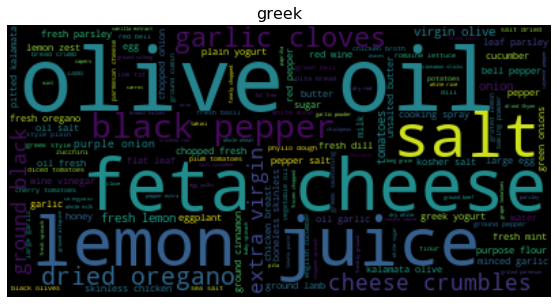

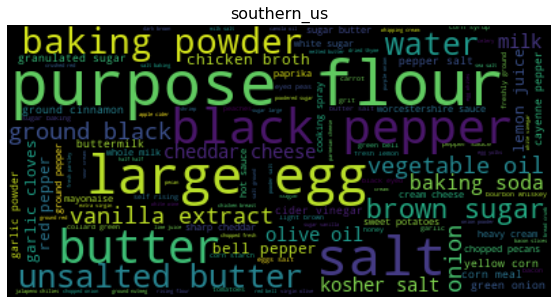

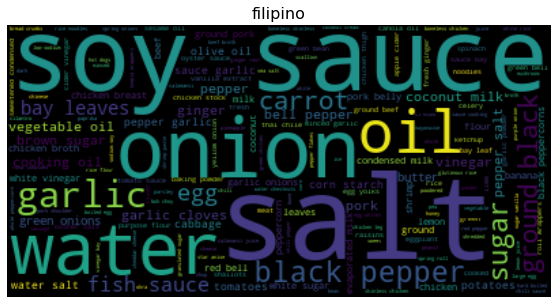

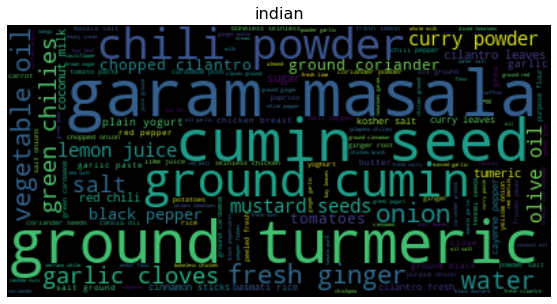

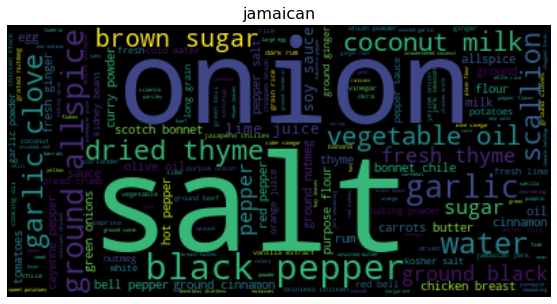

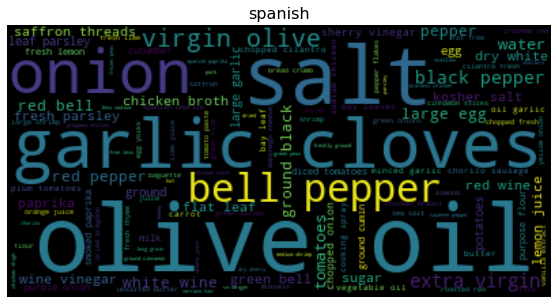

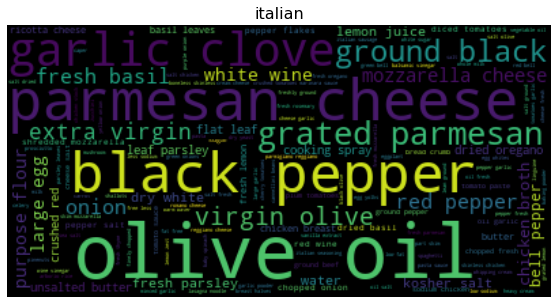

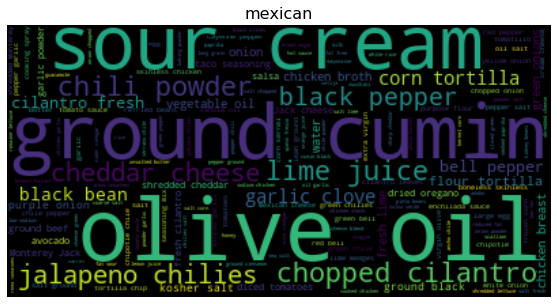

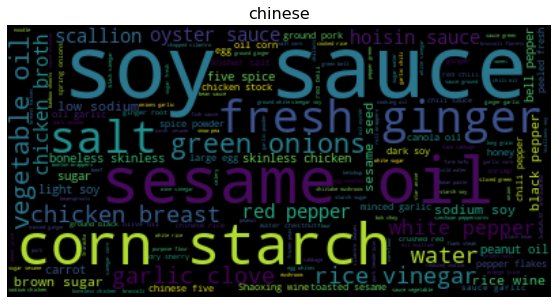

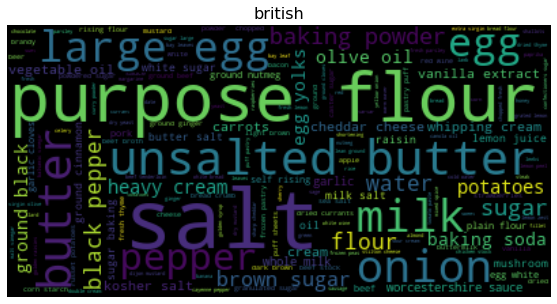

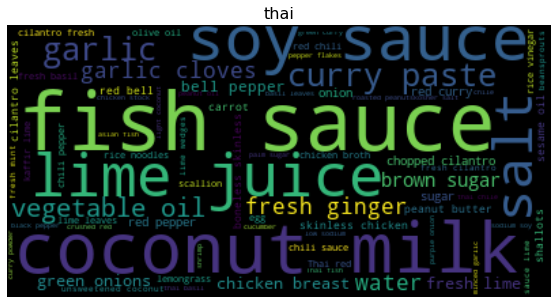

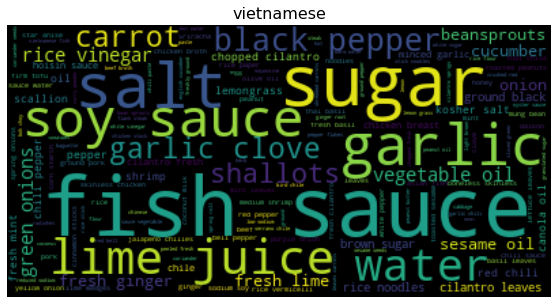

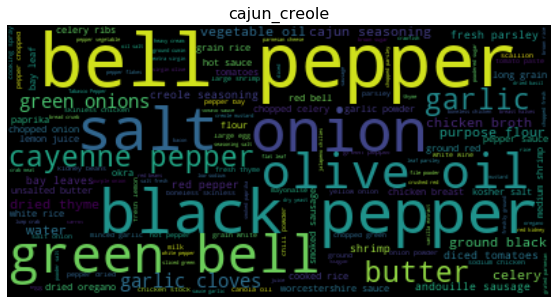

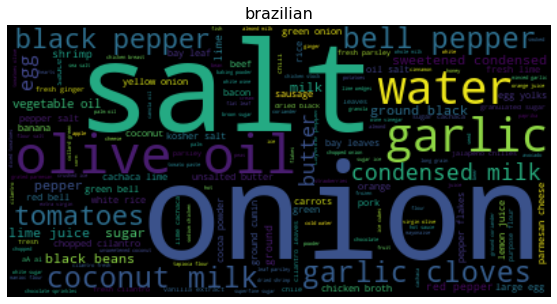

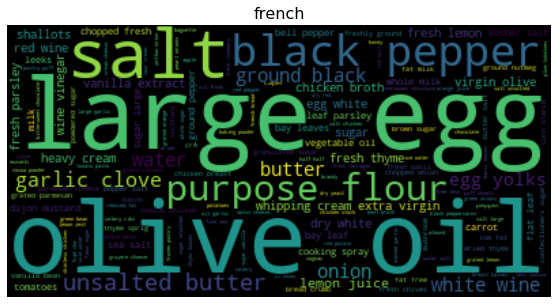

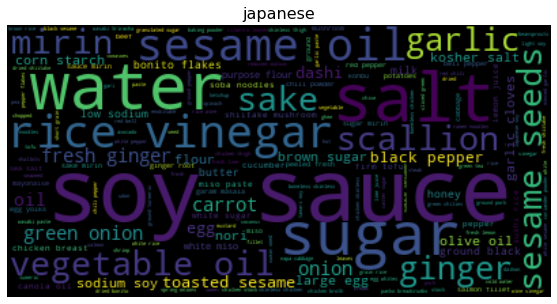

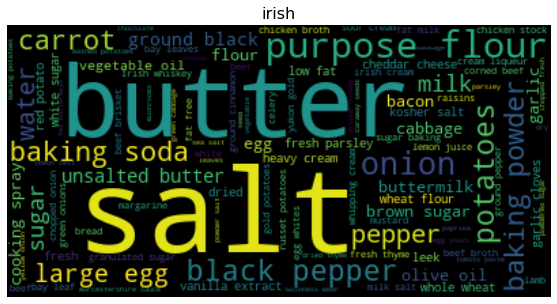

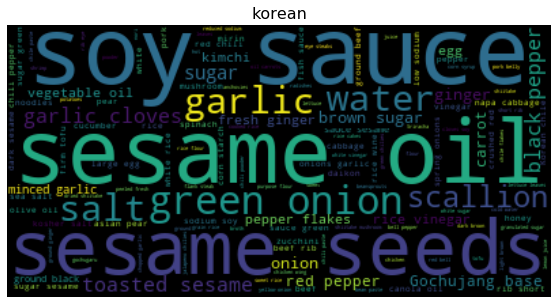

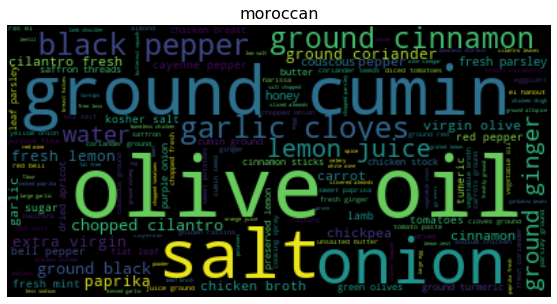

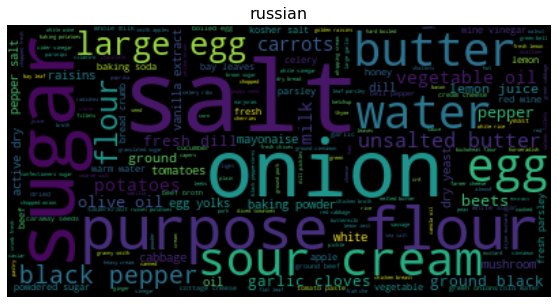

In [19]:
from wordcloud import WordCloud, STOPWORDS
def plot_wordcloud(text, title=None, max = 1000, size=(10,5), title_size=16):
    """plots wordcloud"""
    wordcloud = WordCloud(max_words=max).generate(text)
    plt.figure(figsize=size)
    plt.title(title, size=title_size)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
for c in cloud.cuisine.unique():
    temp = cloud[cloud.cuisine == c]
    text = ' '.join(sum([x for x in temp.ingredients], []))
    plot_wordcloud(text, title=c)

# We can't deal with categorical columns as our machine learning algorithms doesn't understand it,therefore it is important to convert categorical values into numeric

# CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.
## Here we are using countvectorizer on both train and test data to convert words into frequency(numeric value)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')], lowercase=False)
dummies = vect.fit_transform(train['ingredients'].apply(','.join)) 

train = pd.DataFrame(dummies.todense(),columns=vect.get_feature_names())
print("Vocab Length: ", len(vect.get_feature_names()))
print("All Data Shape: ", train.shape)

print("Number of Predictors: ", train.shape[0])
train.head(20)

Vocab Length:  7147
All Data Shape:  (49718, 7147)
Number of Predictors:  49718


(    oz.) tomato sauce  (   oz.) tomato paste  \
0   0                       0                      0   
1   0                       0                      0   
2   0                       0                      0   
3   0                       0                      0   
4   0                       0                      0   
5   0                       0                      0   
6   0                       0                      0   
7   0                       0                      0   
8   0                       0                      0   
9   0                       0                      0   
10  0                       0                      0   
11  0                       0                      0   
12  0                       0                      0   
13  0                       0                      0   
14  0                       0                      0   
15  0                       0                      0   
16  0                       0                      0   
17  0                       0                      0   
18  0                       0                      0   
19  0                       0                      0   

    (10 oz.) frozen chopped spinach  (14 oz.) sweetened condensed milk  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   
5                                 0                                  0   
6                                 0                                  0   
7                                 0                                  0   
8                                 0                                  0   
9                                 0                                  0   
10                                0                                  0   
11                                0                                  0   
12                                0                                  0   
13                                0                                  0   
14                                0                                  0   
15                                0                                  0   
16                                0                                  0   
17                                0                                  0   
18                                0                                  0   
19                                0                                  0   

    (14.5 oz.) diced tomatoes  (15 oz.) refried beans  1 inch thick  \
0                           0                       0             0   
1                           0                       0             0   
2                           0                       0             0   
3                           0                       0             0   
4                           0                       0             0   
5                           0                       0             0   
6                           0                       0             0   
7                           0                       0             0   
8                           0                       0             0   
9                           0                       0             0   
10                          0                       0             0   
11                          0                       0             0   
12                          0                       0             0   
13                          0                       0             0   
14                          0                       0             0   
15                          0                       0             0   
16                          0                       0             0 

# Spliting train dataset into feature(X) and target columns(Y)

In [21]:
X = train.iloc[0:39774]
print("Number of Cuisine Types: ", y.nunique())
print("X Shape: ", X.shape)
test_df = train.iloc[39774:49718]
print("Test DF Shape: ", test_df.shape)

Number of Cuisine Types:  cuisine    20
dtype: int64
X Shape:  (39774, 7147)
Test DF Shape:  (9944, 7147)


# Importing algorithms to build and train our model
## Here I am using Logistic regression algorithm

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [23]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

# We have multiple columns as feature, therefore it's a case of multiclass ->We are using one-over-rest method

In [24]:
model = LogisticRegression(multi_class= 'ovr')
score = cross_validate(model, X, y, return_train_score=False)
score["test_score"].mean()

C:\Users\Khushi Patidar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Khushi Patidar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Khushi Patidar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Khushi Patidar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Khushi Patidar\Anaconda3\

0.7759346477345771

# Fiiting our data in model using fit function

In [25]:
model.fit(X,y)

C:\Users\Khushi Patidar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Khushi Patidar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Submission in CSV file 

In [26]:
submission= model.predict(test_df)
submission=pd.DataFrame(submission)
submission.columns=['cuisine']

In [27]:
mysubmission=pd.DataFrame(test.index)
mysubmission=pd.concat([mysubmission,submission],axis=1)
mysubmission.set_index('id',inplace=True)
mysubmission.head()

cuisine
id                 
18009       british
28583   southern_us
41580       italian
29752  cajun_creole
35687       italian

In [28]:
mysubmission.shape

(9944, 1)

In [29]:
mysubmission.to_csv("C:/Users/Khushi Patidar/Desktop/cooking/submission.csv",index=False)